In [3]:
import pandas as pd

df_train = pd.read_csv('train.txt', sep="\t")
df_test = pd.read_csv('test.txt', sep="\t")
df_all = pd.concat([df_train, df_test])

In [4]:
df_all

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [5]:
df_all['word_count'] = df_all['document'].apply(lambda x: len(str(x).split()))

df_all['unique_word_count'] = df_all['document'].apply(lambda x: len(set(str(x).split())))

df_all['url_count'] = df_all['document'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

df_all['char_count'] = df_all['document'].apply(lambda x: len(str(x)))


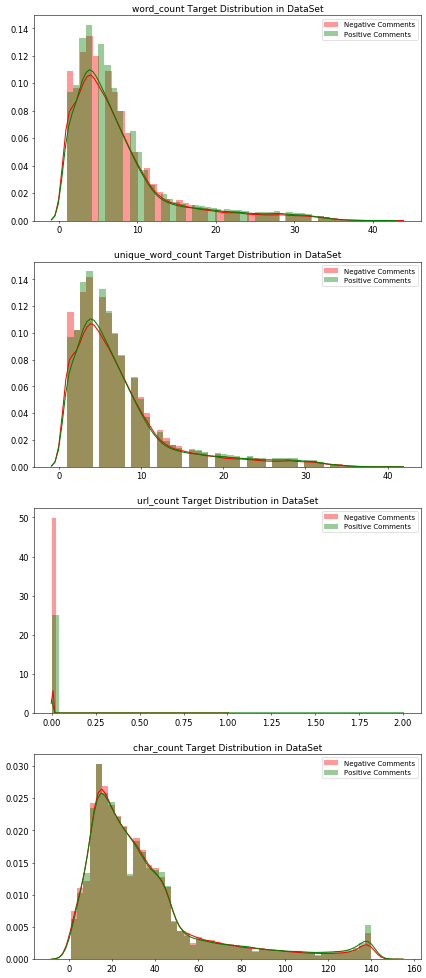

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

FEATURES = ['word_count', 'unique_word_count', 'url_count', 'char_count']

fig, axes = plt.subplots(ncols=1, nrows=len(FEATURES), figsize=(10, 25), dpi=50)

NEGATIVE_COMMENTS = df_all['label'] == 0

for i, feature in enumerate(FEATURES):
    sns.distplot(df_all.loc[~NEGATIVE_COMMENTS][feature], label='Negative Comments', ax=axes[i], color='red')
    sns.distplot(df_all.loc[NEGATIVE_COMMENTS][feature], label='Positive Comments', ax=axes[i], color='green')
    
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in DataSet', fontsize=13)

plt.show()

In [51]:
df_all = df_all.dropna(axis = 0)
df_all.drop_duplicates(subset=['document'], inplace=True)

df_all[df_all['document'].str.contains('O ')]

,id,document,label,word_count,unique_word_count,url_count,char_count
53,7865630,"난또 저 꼬마애가 무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어...",0,13,13,0,50
526,5364316,박얘쁜 빠수니 죄다 OO 없어져버려,0,5,5,0,19
693,7441317,"진짜 이런 개 씨,1바ㄹ OOO 같은 영화 개 시간낭비 의미도없고 무섭지도않고 내가...",0,18,16,0,76
1175,3271997,정준호 OOO 떄문에 일점이다.,0,4,4,0,17
1285,4383895,좋은소재 못 살린 OO 감독. 연출만 잘 했어도 대단한 영화가 되었을텐데...쯧쯧..,0,11,11,0,47
...,...,...,...,...,...,...,...
45785,6010853,"OOO 영화 재미, 몰임감, 현저히 없음.",0,6,6,0,23
49336,6338801,미치도록 훌륭한 그러나 괴랄하게 난잡한 고전에 절대 OOO 않는 영화,1,10,10,0,38
49482,7045309,치명적인 매력은 OOO 얼어죽을.. 여자만 후리면 치명적이래 개뿔 기둥서방 지조없는...,0,32,32,0,139
49819,8746822,OOO 한국영화도 8점대가 쑤두룩한데 이 영화는 9점대가 정상인 영화다!!,1,9,9,0,41


In [27]:
df_all[df_all['id'] == 10183810]['document']

10678    Carpe Diem..Sieze the day, boys. Make your lif...
Name: document, dtype: object

In [41]:
from transformers import BertTokenizerFast, BertModel, AdamW
tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")

In [42]:
tokenizer("난또 저 꼬마애가 S무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어...")

{'input_ids': [2, 2787, 8517, 6015, 25422, 33025, 15440, 5805, 34139, 2492, 15426, 2016, 2014, 2016, 18598, 2055, 8127, 14158, 14887, 2783, 8152, 8013, 2055, 8127, 8053, 5590, 2016, 2016, 2016, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [49]:
document = "난또 저 꼬마애가 무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어..."
# tokenizer.add_tokens("OO")

tokenizer.add_tokens(["OO"], special_tokens=True)

0

In [50]:
tokenizer.tokenize(document)

['난',
 '##또',
 '저',
 '꼬마',
 '##애가',
 '무슨',
 '원',
 '##한이',
 '깊',
 '##길래',
 '.',
 ',',
 '.',
 '했더니',
 'OO',
 '그냥',
 '혼자',
 '나',
 '##대',
 '##다',
 'OO',
 '걸',
 '어',
 '.',
 '.',
 '.']

In [52]:
df_all[df_all['url_count']>0]

,id,document,label,word_count,unique_word_count,url_count,char_count
1456,9949323,장난하나 재미도 드럽게없고 이게 실화라고? 여기서봐라 not real이다 http:...,0,9,9,1,120
2421,9488373,꼬라기 非추천 영화.... the 10th ?상실 → 상처 → 후회 → 추억 →→→...,1,22,20,1,129
4453,7255819,동성애자 실태보고 http://news.donga.com/3/all/20070518...,0,6,6,2,120
4677,10087793,http://blog.naver.com/dicasso6 이영화를 좋아하시는 분들 초대,1,5,5,1,47
4926,9571784,꼬라기 非추천 영화.... the 24th .... http://blog.naver...,1,7,7,1,72
7692,7416488,http://www.youtube.com/watch?v=vp77rRvoTkM 해군사...,0,16,16,1,121
11413,8501661,전쟁에 관한 걸작 중의 하나. 테렌스 멜릭 감독의 심호한 철학적 사고가 깊이 베인 ...,1,24,23,1,134
17863,9994195,나인스 게이트에 숨은 상징http://www.podbbang.com/ch/7286,1,4,4,1,45
24676,9220355,http://news.naver.com/main/read.nhn?mode=LSD&m...,0,13,13,1,139
26571,8635725,http://news.naver.com/main/read.nhn?mode=LSD&m...,0,1,1,1,84


In [53]:
df_all['document'] = df_all['document'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [54]:
df_all[df_all['url_count'] > 0]

,id,document,label,word_count,unique_word_count,url_count,char_count
1456,9949323,장난하나 재미도 드럽게없고 이게 실화라고? 여기서봐라 not real이다,0,9,9,1,120
2421,9488373,꼬라기 非추천 영화.... the 10th ?상실 → 상처 → 후회 → 추억 →→→...,1,22,20,1,129
4453,7255819,동성애자 실태보고 동성애자의 양심고백,0,6,6,2,120
4677,10087793,이영화를 좋아하시는 분들 초대,1,5,5,1,47
4926,9571784,꼬라기 非추천 영화.... the 24th ....,1,7,7,1,72
7692,7416488,"해군사관학교졸업,유도미사일 부서책임자, 6개의 공개법인 대표, 이중 4개 회사는 ...",0,16,16,1,121
11413,8501661,전쟁에 관한 걸작 중의 하나. 테렌스 멜릭 감독의 심호한 철학적 사고가 깊이 베인 ...,1,24,23,1,134
17863,9994195,나인스 게이트에 숨은 상징,1,4,4,1,45
24676,9220355,"저도 덴티스트를 본 사람이지만 이건 정말 노골적으로 베꼈다고 밖에는..끝자락, 결...",0,13,13,1,139
26571,8635725,,0,1,1,1,84
